In [22]:
#Импортируем перечень бумаг Доу Джонс
import pandas as pd
url = 'https://finance.yahoo.com/quote/RUB%3DX/chart?p=RUB%3DX'
df = pd.read_html(url)[0]
df

ValueError: No tables found

In [7]:
#Выгружаем тикера и названия компаний
names=df[['Symbol','Company Name']]
symbol=names['Symbol'].values
full_name=names['Company Name'].values
print(symbol)
print(full_name)

['DD' 'GS' 'JNJ' 'JPM' 'VZ' 'IBM' 'V' 'AXP' 'HD' 'DIS' 'XOM' 'KO' 'PFE'
 'CSCO' 'WMT' 'PG' 'CAT' 'TRV' 'UTX' 'MMM' 'MCD' 'BA' 'NKE' 'UNH' 'GE'
 'AAPL' 'CVX' 'MRK' 'MSFT' 'INTC']
['E. I. du Pont de Nemours and Company' 'The Goldman Sachs Group, Inc.'
 'Johnson & Johnson' 'JPMorgan Chase & Co.' 'Verizon Communications Inc.'
 'International Business Machines Corporation' 'Visa Inc.'
 'American Express Company' 'The Home Depot, Inc.'
 'The Walt Disney Company' 'Exxon Mobil Corporation'
 'The Coca-Cola Company' 'Pfizer Inc.' 'Cisco Systems, Inc.'
 'Wal-Mart Stores, Inc.' 'The Procter & Gamble Company' 'Caterpillar Inc.'
 'The Travelers Companies, Inc.' 'United Technologies Corporation'
 '3M Company' "McDonald's Corporation" 'The Boeing Company' 'NIKE, Inc.'
 'UnitedHealth Group Incorporated' 'General Electric Company' 'Apple Inc.'
 'Chevron Corporation' 'Merck & Co., Inc.' 'Microsoft Corporation'
 'Intel Corporation']


In [8]:
#грузим исторические данные на цену закрытия
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)

data_exchange={}

# Экспорт с Yahoo
#for s in symbol:
#    data_exchange[s]=  web.DataReader(s,'yahoo', start, end) 
#data_exchange

# Экспорт с Google
for s in symbol:
    data_exchange[s]=web.get_data_google(s,start,end) 
data_exchange

{'AAPL':               Open    High     Low   Close    Volume
 Date                                                
 2016-10-31  113.65  114.23  113.20  113.54  26419398
 2016-11-01  113.46  113.77  110.53  111.49  43825812
 2016-11-02  111.40  112.35  111.23  111.59  28331709
 2016-11-03  110.98  111.46  109.55  109.83  26932602
 2016-11-04  108.53  110.25  108.11  108.84  30836997
 2016-11-07  110.08  110.51  109.46  110.41  32560000
 2016-11-08  110.31  111.72  109.70  111.06  24254179
 2016-11-09  109.88  111.32  108.05  110.88  59176361
 2016-11-10  111.09  111.09  105.83  107.79  57134541
 2016-11-11  107.12  108.87  106.55  108.43  34143898
 2016-11-14  107.71  107.81  104.08  105.71  51175504
 2016-11-15  106.57  107.68  106.16  107.11  32264510
 2016-11-16  106.70  110.23  106.60  109.99  58840522
 2016-11-17  109.81  110.35  108.83  109.95  26964598
 2016-11-18  109.72  110.54  109.66  110.06  28428917
 2016-11-21  110.12  111.99  110.01  111.73  29264571
 2016-11-22  111.95 

In [9]:
price = pd.DataFrame({ tic: data['Close'] for tic, data in data_exchange.items() })
price

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,113.54,66.42,142.43,83.46,30.68,104.75,68.79,92.69,29.10,178.24,...,50.18,31.71,86.80,108.18,141.33,102.20,82.51,48.10,70.02,83.32
2016-11-01,111.49,66.25,142.41,82.24,30.48,106.48,68.44,92.39,28.88,178.06,...,49.62,31.07,86.85,106.24,139.43,102.01,81.62,47.66,69.30,83.65
2016-11-02,111.59,65.45,140.75,81.11,30.39,105.39,68.36,91.91,28.49,176.58,...,49.72,30.63,86.74,105.62,138.98,101.54,80.58,46.94,69.45,83.45
2016-11-03,109.83,65.33,140.02,81.27,30.32,105.39,68.50,93.37,28.28,176.21,...,49.73,29.89,86.60,105.72,137.83,101.05,80.65,46.87,69.63,83.66
2016-11-04,108.84,65.51,139.54,82.31,30.19,104.78,68.61,92.45,28.44,175.92,...,49.96,30.00,85.08,104.67,137.71,101.33,80.36,47.08,69.16,83.57
2016-11-07,110.41,67.00,143.03,83.75,30.94,106.85,69.51,94.43,29.31,181.48,...,50.91,30.38,86.56,105.36,141.93,103.05,82.51,47.46,69.78,85.45
2016-11-08,111.06,67.07,142.20,84.68,31.00,107.29,69.26,94.38,29.42,181.92,...,51.08,30.00,87.46,108.01,142.90,103.37,82.88,47.65,69.79,85.31
2016-11-09,110.88,68.74,145.09,91.20,31.36,107.64,70.28,94.64,29.63,192.63,...,51.12,32.12,85.93,106.94,141.90,104.81,83.24,47.86,71.10,86.25
2016-11-10,107.79,70.11,147.69,93.45,31.00,107.79,70.95,94.96,30.41,200.87,...,50.39,33.49,82.96,109.62,146.13,108.41,81.87,46.69,71.39,87.05


In [10]:
result_corr=price.corr().replace(1,0)
result_corr

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
AAPL,0.000000,0.812084,0.840925,0.745196,0.557783,-0.222643,0.874111,0.081608,-0.808384,0.099902,...,0.418982,0.623282,0.767258,0.709708,0.869627,0.743952,0.921307,-0.498782,0.796963,-0.824101
AXP,0.812084,0.000000,0.945517,0.919930,0.459522,0.203594,0.899341,-0.129616,-0.852090,0.380277,...,0.355743,0.789974,0.697582,0.778001,0.939796,0.636637,0.909637,-0.238846,0.777941,-0.587705
BA,0.840925,0.945517,0.000000,0.953403,0.394448,0.154817,0.825886,-0.289862,-0.941606,0.162150,...,0.257755,0.732048,0.739201,0.683653,0.953345,0.566810,0.963647,-0.264013,0.866287,-0.652191
CAT,0.745196,0.919930,0.953403,0.000000,0.299744,0.263935,0.730726,-0.398156,-0.913010,0.172000,...,0.090776,0.684740,0.570762,0.645541,0.924275,0.561454,0.908247,-0.241712,0.884296,-0.496654
CSCO,0.557783,0.459522,0.394448,0.299744,0.000000,-0.027932,0.489723,0.343829,-0.304477,0.349687,...,0.359776,0.718889,0.575151,0.357772,0.330307,0.334459,0.469089,-0.167878,0.324448,-0.414262
CVX,-0.222643,0.203594,0.154817,0.263935,-0.027932,0.000000,-0.467611,-0.278768,-0.013144,0.581226,...,-0.329519,0.314428,-0.007864,0.005810,0.048254,-0.354572,-0.034155,0.741431,-0.010869,0.499676
DD,0.874111,0.899341,0.825886,0.730726,0.489723,-0.467611,0.000000,0.485452,-0.665578,0.269210,...,0.708728,0.651428,0.720695,0.860152,0.865327,0.798138,0.842157,-0.477253,0.632431,-0.706187
DIS,0.081608,-0.129616,-0.289862,-0.398156,0.343829,-0.278768,0.485452,0.000000,0.431051,0.396420,...,0.520058,-0.014684,0.040095,0.183703,-0.185547,0.211194,-0.223277,0.027934,-0.335300,-0.057535
GE,-0.808384,-0.852090,-0.941606,-0.913010,-0.304477,-0.013144,-0.665578,0.431051,0.000000,0.075790,...,-0.164812,-0.589623,-0.659892,-0.556930,-0.893697,-0.531311,-0.952104,0.432609,-0.871264,0.696107
GS,0.099902,0.380277,0.162150,0.172000,0.349687,0.581226,0.269210,0.396420,0.075790,0.000000,...,0.290378,0.459959,0.198635,0.444899,0.186730,0.108652,0.052317,0.466370,-0.070033,0.157654


In [11]:
# заменяем числа исходя из нужного условия
result=(abs(result_corr)>0.8).astype(int)
result
# альтернативный вариант
# result_corr[abs(result_corr>0)]=1   
# result_corr[abs(result_corr<0)]=-1
# result_corr[abs(result_corr==0)]="a"
# result=result_corr

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
AAPL,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
AXP,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
BA,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
CAT,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
CSCO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DD,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
DIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GE,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
GS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


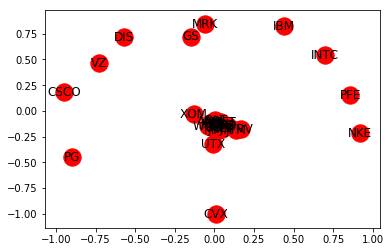

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

A=result.values
G=nx.from_numpy_matrix(A)
mapping=dict(zip(G.nodes(),result.index))

G1=nx.relabel_nodes(G,mapping)

#nx.draw_networkx(G1)
nx.draw_networkx(G1,pos=nx.spring_layout(G1))
plt.show()

In [13]:
clique=list(nx.find_cliques(G1))
print(clique)
max_clique=max(clique,key=len)
print()
print("максимальная ",max_clique)


[['XOM', 'AAPL'], ['VZ'], ['CSCO'], ['JPM', 'DD', 'UNH', 'AXP'], ['JPM', 'DD', 'TRV'], ['MRK'], ['GS'], ['NKE'], ['PFE'], ['PG'], ['DIS'], ['MMM', 'TRV', 'DD'], ['MMM', 'UTX'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'AAPL', 'AXP', 'HD', 'DD'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'AAPL', 'AXP', 'GE'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'AAPL', 'KO', 'HD'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'AAPL', 'KO', 'GE'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'WMT', 'KO', 'GE'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'CAT', 'GE', 'AXP'], ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'CAT', 'GE', 'WMT', 'KO'], ['IBM'], ['INTC'], ['CVX']]

максимальная  ['MMM', 'MCD', 'BA', 'V', 'UNH', 'MSFT', 'JNJ', 'AAPL', 'AXP', 'HD', 'DD']


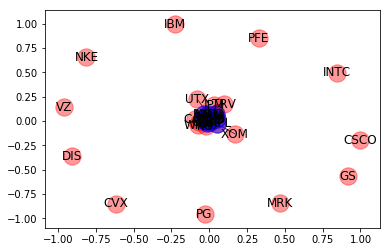

In [14]:
pos = nx.fruchterman_reingold_layout(G1,dim=2,k=0.2)
nx.draw_networkx_nodes(G1,pos,node_color='r',alpha=0.4)
nx.draw_networkx_nodes(G1,pos,nodelist=max_clique,node_color='b',alpha=0.5)
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.8)
nx.draw_networkx_labels(G1,pos)
plt.show()

In [15]:
names


,Symbol,Company Name
0,DD,E. I. du Pont de Nemours and Company
1,GS,"The Goldman Sachs Group, Inc."
2,JNJ,Johnson & Johnson
3,JPM,JPMorgan Chase & Co.
4,VZ,Verizon Communications Inc.
5,IBM,International Business Machines Corporation
6,V,Visa Inc.
7,AXP,American Express Company
8,HD,"The Home Depot, Inc."
9,DIS,The Walt Disney Company


In [16]:
from IPython.display import display
# Имена бумаг в клике
max_clique_name=names.loc[names['Symbol'].isin(max_clique)]
display(max_clique_name)
# Только имена бумаг
print(max_clique_name['Company Name'].values)

,Symbol,Company Name
0,DD,E. I. du Pont de Nemours and Company
2,JNJ,Johnson & Johnson
6,V,Visa Inc.
7,AXP,American Express Company
8,HD,"The Home Depot, Inc."
19,MMM,3M Company
20,MCD,McDonald's Corporation
21,BA,The Boeing Company
23,UNH,UnitedHealth Group Incorporated
25,AAPL,Apple Inc.


['E. I. du Pont de Nemours and Company' 'Johnson & Johnson' 'Visa Inc.'
 'American Express Company' 'The Home Depot, Inc.' '3M Company'
 "McDonald's Corporation" 'The Boeing Company'
 'UnitedHealth Group Incorporated' 'Apple Inc.' 'Microsoft Corporation']


In [17]:
# Имена бумаг вне в клики
no_max_clique_name=names.loc[~names['Symbol'].isin(max_clique)]
no_max_clique_name

,Symbol,Company Name
1,GS,"The Goldman Sachs Group, Inc."
3,JPM,JPMorgan Chase & Co.
4,VZ,Verizon Communications Inc.
5,IBM,International Business Machines Corporation
9,DIS,The Walt Disney Company
10,XOM,Exxon Mobil Corporation
11,KO,The Coca-Cola Company
12,PFE,Pfizer Inc.
13,CSCO,"Cisco Systems, Inc."
14,WMT,"Wal-Mart Stores, Inc."


In [18]:
pd.DataFrame( max_clique_name['Company Name'].values, columns=['Compamy'] )

,Compamy
0,E. I. du Pont de Nemours and Company
1,Johnson & Johnson
2,Visa Inc.
3,American Express Company
4,"The Home Depot, Inc."
5,3M Company
6,McDonald's Corporation
7,The Boeing Company
8,UnitedHealth Group Incorporated
9,Apple Inc.


In [19]:
train[f].dtype=='object'

NameError: name 'train' is not defined